In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas as pd
pd.__version__  # for the record

'1.1.2'

In [3]:
import mplfinance as mpf
mpf.__version__  # for the record

'0.12.7a1'

In [4]:
df = pd.read_csv('data/SPY_20110701_20120630_Bollinger.csv',index_col=0,parse_dates=True)
df.shape
df.head(3)
df.tail(3)

(252, 9)

,Open,High,Low,Close,Adj Close,Volume,UpperB,LowerB,PercentB
Date,,,,,,,,,
2011-07-01,132.089996,134.100006,131.779999,133.919998,117.161659,202385700,132.373927,125.316073,1.219057
2011-07-05,133.779999,134.080002,133.389999,133.809998,117.065437,165936000,133.254297,124.912703,1.066618
2011-07-06,133.490005,134.139999,133.110001,133.970001,117.205429,143331600,134.040915,124.627085,0.992467


,Open,High,Low,Close,Adj Close,Volume,UpperB,LowerB,PercentB
Date,,,,,,,,,
2012-06-27,132.419998,133.429993,131.970001,133.169998,118.980804,108088000,136.447962,128.140042,0.605441
2012-06-28,132.289993,132.990005,131.279999,132.789993,118.641281,169242100,136.500761,128.219241,0.551922
2012-06-29,135.199997,136.270004,134.850006,136.100006,121.598610,212250900,136.721010,128.792993,0.921670


---

Let's highlight whenever the "Percent B" Bollinger metric drops below zero.  
To do this, let's first calculate a series that contains this information:

In [5]:
def percentB_belowzero(percentB,price):
    import numpy as np
    signal   = []
    previous = -1.0
    for date,value in percentB.iteritems():
        if value < 0 and previous >= 0:
            signal.append(price[date]*0.99)
        else:
            signal.append(np.nan)
        previous = value
    return signal

---
Take a small data set, and calculate a series that shows when the percentB falls below zero:

In [6]:
tdf = df.loc['05-10-2012':'06-07-2012',]  # Take a smaller data set so it's easier to see the scatter points

signal = percentB_belowzero(tdf['PercentB'], tdf['Close'])

---

Now plot the calculated information as an additional scatter plot on top of the the OHLC data:

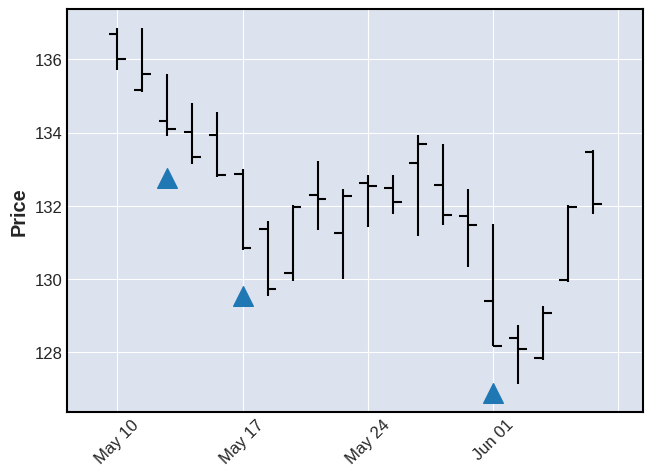

In [7]:
apd = mpf.make_addplot(signal,type='scatter',markersize=200,marker='^')

mpf.plot(tdf,addplot=apd)

In [8]:
signal

[nan,
 nan,
 132.76890099000002,
 nan,
 nan,
 129.55140099000002,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 126.87840395999999,
 nan,
 nan,
 nan,
 nan]

## Now, what if we have only the signals (without nans in between)?  

## Since `show_nontrading=False` (the default/unspecified value), <br>we need to specify the ***row number*** from the original dataframe as the x-value (not the date) ...

In [9]:
import numpy as np
x = []
y = []
for row,value in enumerate(signal):
    if not np.isnan(value):
        x.append(row)
        y.append(value)
        x.append(row)        # demonstrate having another value at the same x-coordinate
        y.append(value+4.0)  # demonstrate having another value at the same x-coordinate

x
y   

[2, 2, 5, 5, 15, 15]

[132.76890099000002,
 136.76890099000002,
 129.55140099000002,
 133.55140099000002,
 126.87840395999999,
 130.87840395999999]

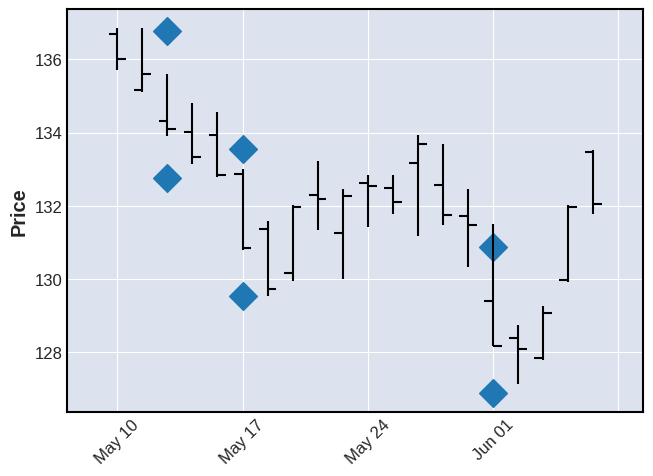

In [10]:
fig, axlist = mpf.plot(tdf,returnfig=True)
ax = axlist[0]
ax.scatter(x,y,s=200,marker='D')
mpf.show()